In [20]:
import numpy as np
import matplotlib.pyplot as plt

In [21]:
from tqdm import tqdm

In [22]:
def perceptron(train_x,train_y,test_x):
    
    w = np.zeros(train_x.shape[1]) # weight
    mistake = 0 
    
    for t in range(len(x)):
        y_pre = np.sign(w @ train_x[t]) 
        
        if y_pre*train_y[t] <= 0:
            w += train_y[t]*train_x[t]
            mistake += 1
        else:
            continue
        
    test_y = np.sign(test_x @ w)
    return test_y


def winnow(train_x,train_y,test_x):
   
    w = np.ones(x.shape[1])
    n = x.shape[1]
    
    for t in range(len(x)):
        
        y_pre = np.where(w @ train_x[t] < n, 0, 1)
        
        if y_pre!=train_y[t]:
           
            w *= np.float_power(2, ((train_y[t]-y_pre)*train_x[t])) # including negative power
        else:
            continue   
            
    test_y = np.where(test_x @ w < n, 0, 1)        
    return test_y


def least_squares(train_x,train_y,test_x):
       
    w = np.linalg.pinv(train_x) @ train_y
    test_y = np.sign(test_x @ w)  
    return test_y


def one_NN(train_x,train_y,test_x):
    Y_pred = []
    for j in range(len(test_x)):
        xj = test_x[j,:]
        dist = np.sum((train_x - xj)**2, axis = 1)  
        y_pred = train_y[np.argmin(dist)] 
        Y_pred.append(y_pred)
    return np.array(Y_pred)

In [23]:
def dataset(m, n, algo = None):
    if algo == winnow:
        # winnow
        X = np.random.choice([1,0],(m,n)) 
    else:    
        X = np.random.choice([1,-1],(m,n)) 
    
    Y = X[:,0] 
    return X,Y 

In [24]:
def generalisation_err(m, n, s, algo, I):
    
    Err = [] 
    
    for i in range(I):
        x, y = dataset(m,n,algo) # training
        x_t, y_t = dataset(s,n,algo) # testing
        y_pred = algo(x, y, x_t)
        M = np.count_nonzero(y_pred != y_t) # mistakes
        err = M / s
        Err.append(err)
    avg_general_err = np.mean(Err)

    return avg_general_err

In [25]:
def sample_complexity(N,s,algo,I):
 
    sample_complexity = np.zeros(len(N))
    
    i = 0 
    
    for n in N:   
        m = 1  
        avg_general_err = generalisation_err(m, n, s, algo, I) 
        while avg_general_err > 0.1:
            m += 1 
            avg_general_err = generalisation_err(m, n, s, algo, I) 
            
        sample_complexity[i] = m 
        i+=1 
        
    return sample_complexity

In [26]:
def Sample_complexity(N,s,algo,I):
    complexity = np.zeros(shape = (I, np.size(N)))
    for i in tqdm(range(I)):
        complexity[i, :] = sample_complexity(N,s,algo,I)
    avg = np.mean(complexity, axis = 0)
    std = np.std(complexity, axis = 0)
    
    return avg, std

In [42]:
# perceptron
N = range(1, 101)
s = 5000
I = 10
avg0, std0 = Sample_complexity(N,s,perceptron,I)

100%|███████████████████████████████████████████████████████████████████████████████| 10/10 [2:39:12<00:00, 955.26s/it]


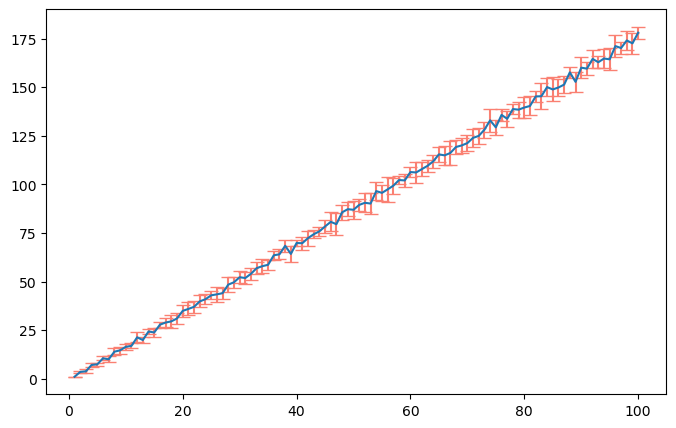

In [43]:
plt.figure(figsize = (8, 5))
plt.errorbar(N,avg0,yerr=std0,ecolor='salmon',capsize=5)
plt.savefig('perceptron(1)', bbox_inches = 'tight')
plt.show()

 
1.782 x - 1.51


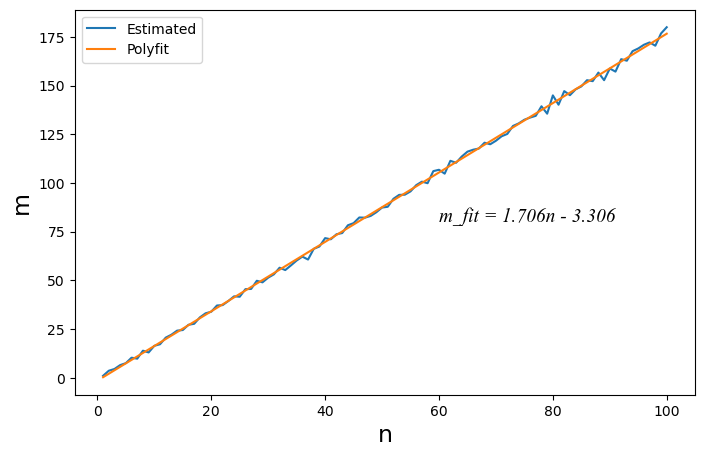

In [29]:
# fitted perceptron
c0 = np.polyfit(N, avg0, 1)
print(np.poly1d(c0))
plt.figure(figsize = (8, 5))
plt.plot(N, avg0, label='Estimated')
plt.plot(N, c0[0]*N+c0[1], label='Polyfit')
plt.xlabel('n', fontsize=17)
plt.ylabel('m', fontsize=17)
plt.legend()
text = 'm_fit = 1.706n - 3.306'
plt.text(60, 80, text, size=14, family="Times new roman", color="black", style='italic', weight = "light")
plt.savefig('perceptron(2)', bbox_inches = 'tight')
plt.show()

In [30]:
# winnow
N = range(1, 101)
s = 5000
I = 10
avg1, std1 = Sample_complexity(N,s,winnow,I)

100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [37:14<00:00, 223.48s/it]


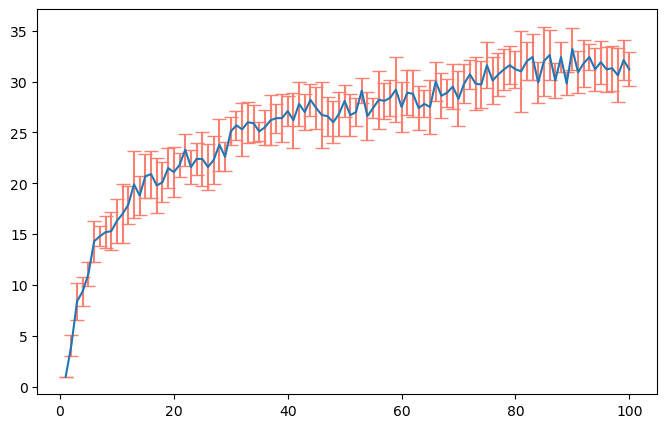

In [31]:
plt.figure(figsize = (8, 5))
plt.errorbar(N,avg1,yerr=std1,ecolor='salmon',capsize=5)
plt.savefig('winnow(1)', bbox_inches = 'tight')
plt.show()

 
6.771 x + 1.023


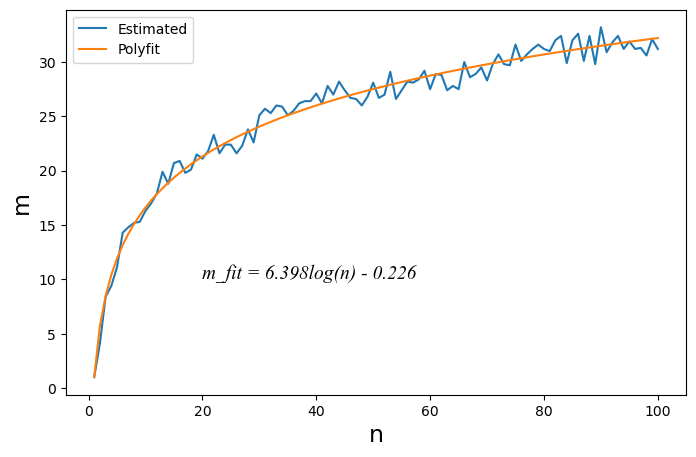

6.771038319909979log(n)1.0230674965315403


In [32]:
# fitted winnow
c1 = np.polyfit(np.log(N), avg1, 1)
print(np.poly1d(c1)) # x = log(n)
plt.figure(figsize = (8, 5))
plt.plot(N, avg1, label='Estimated')
plt.plot(N, c1[0]*np.log(N)+c1[1], label='Polyfit')
plt.xlabel('n', fontsize=17)
plt.ylabel('m', fontsize=17)
plt.legend()
text = 'm_fit = 6.398log(n) - 0.226'
plt.text(20, 10, text, size=14, family="Times new roman", color="black", style='italic', weight = "light")
plt.savefig('winnow(2)', bbox_inches = 'tight')
plt.show()
print(str(c1[0])+'log(n)'+str(c1[1]))

In [33]:
# least_squares
N = range(1, 101)
s = 5000
I = 10
avg2, std2 = Sample_complexity(N,s,least_squares,I)

100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [40:34<00:00, 243.44s/it]


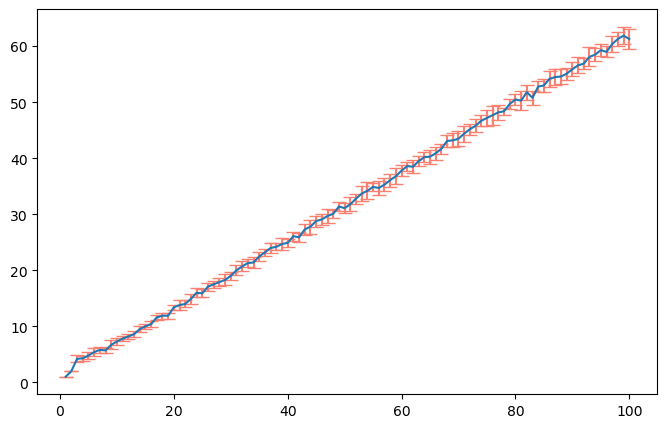

In [34]:
plt.figure(figsize = (8, 5))
plt.errorbar(N,avg2,yerr=std2,ecolor='salmon',capsize=5)
plt.savefig('least_squares(1)', bbox_inches = 'tight')
plt.show()

 
0.6107 x + 1.025


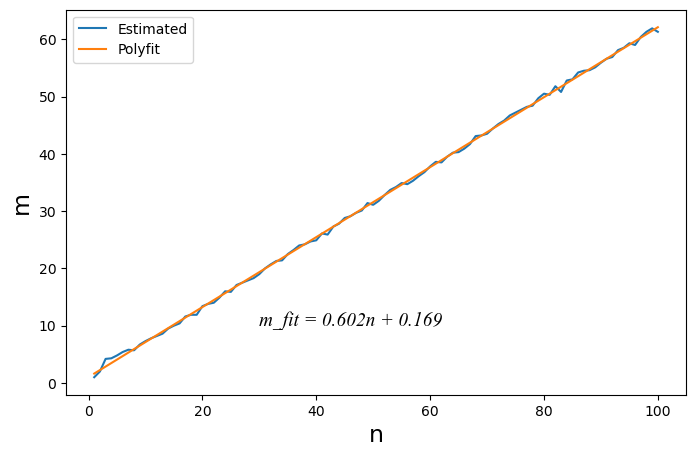

In [35]:
# fitted least_squares
c2 = np.polyfit(N, avg2, 1)
print(np.poly1d(c2)) # x = n
plt.figure(figsize = (8, 5))
plt.plot(N, avg2, label='Estimated')
plt.plot(N, c2[0]*N+c2[1], label='Polyfit')
plt.xlabel('n', fontsize=17)
plt.ylabel('m', fontsize=17)
plt.legend()
text = 'm_fit = 0.602n + 0.169'
plt.text(30, 10, text, size=14, family="Times new roman", color="black", style='italic', weight = "light")
plt.savefig('least_squares(2)', bbox_inches = 'tight')
plt.show()

In [36]:
# one_NN
N = range(1, 16)
s = 2000
I = 5
avg3, std3 = Sample_complexity(N,s,one_NN,I)

100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [1:23:04<00:00, 996.88s/it]


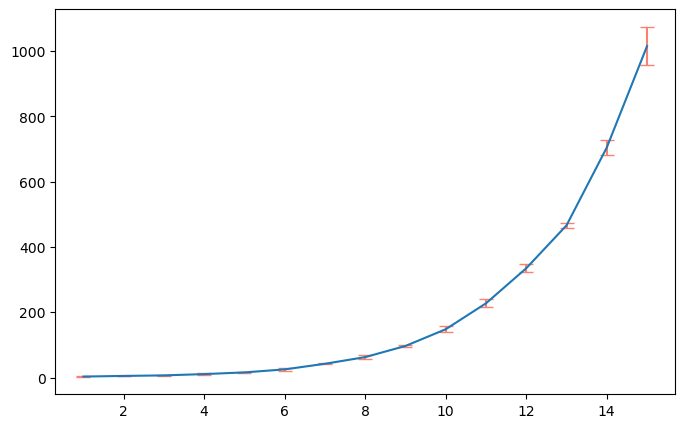

In [37]:
plt.figure(figsize = (8, 5))
plt.errorbar(N,avg3,yerr=std3,ecolor='salmon',capsize=5)
plt.savefig('one_NN(1)', bbox_inches = 'tight')
plt.show()

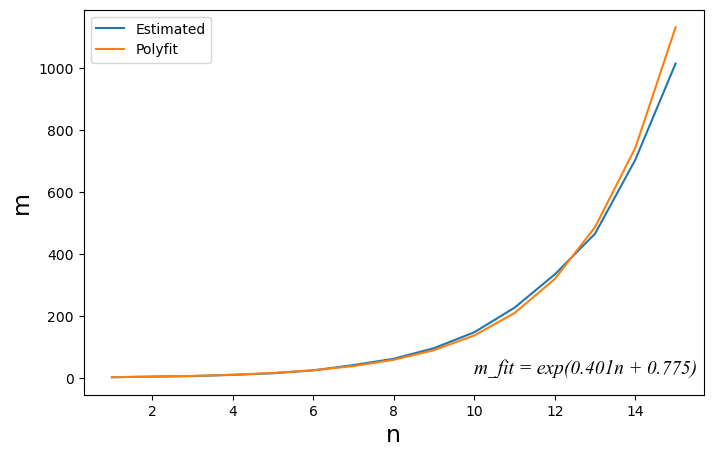

exp(0.42122928159886136*n + 0.7134480280217165)


In [38]:
# fitted one_NN
c3 = np.polyfit(N, np.log(avg3), 1)
plt.figure(figsize = (8, 5))
plt.plot(N, avg3, label='Estimated')
plt.plot(N,np.exp(c3[0]*N+c3[1]) , label='Polyfit')
plt.xlabel('n', fontsize=17)
plt.ylabel('m', fontsize=17)
plt.legend()
text = 'm_fit = exp(0.401n + 0.775)'
plt.text(10, 12, text, size=14, family="Times new roman", color="black", style='italic', weight = "light")
plt.savefig('one_NN(2)', bbox_inches = 'tight')
plt.show()
print('exp('+str(c3[0])+'*n + '+str(c3[1])+')')